In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_raw = pd.read_csv("Train.csv")
test_raw = pd.read_csv("Test.csv")
submit_raw = pd.read_csv("sample_submission.csv")

In [3]:
train_raw.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [36]:
train = train_raw.copy()
test = test_raw.copy()

In [37]:
train_raw.nunique()

mass_npea         8847
size_npear        8859
malign_ratio      7386
damage_size       8861
exposed_area      8949
std_dev_malign    8802
err_malign        8831
malign_penalty     315
damage_ratio      8641
tumor_size        6511
dtype: int64

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mass_npea       9146 non-null   float64
 1   size_npear      9146 non-null   float64
 2   malign_ratio    9146 non-null   float64
 3   damage_size     9146 non-null   float64
 4   exposed_area    9146 non-null   float64
 5   std_dev_malign  9146 non-null   float64
 6   err_malign      9146 non-null   float64
 7   malign_penalty  9146 non-null   int64  
 8   damage_ratio    9146 non-null   float64
 9   tumor_size      9146 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [39]:
train.shape

(9146, 10)

In [40]:
train.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [41]:
from matplotlib import pyplot as plt

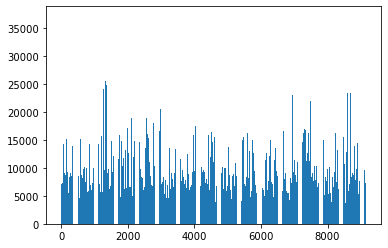

In [42]:
plt.bar(train.index, train['mass_npea'])
plt.show()

In [43]:
import seaborn as sns 

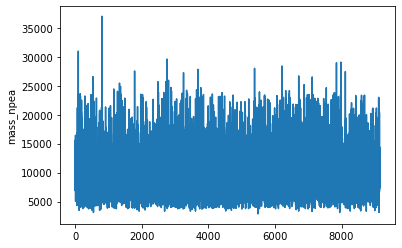

In [44]:
sns.lineplot(train.index, train['mass_npea'], data=train) 
plt.show()

<AxesSubplot:>

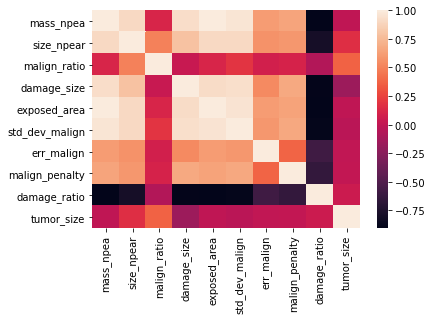

In [45]:
sns.heatmap(train.corr())

In [46]:
y = train['tumor_size']

In [47]:
train = train.drop('tumor_size', axis = 1)

In [48]:
train.columns

Index(['mass_npea', 'size_npear', 'malign_ratio', 'damage_size',
       'exposed_area', 'std_dev_malign', 'err_malign', 'malign_penalty',
       'damage_ratio'],
      dtype='object')

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.2)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((7316, 9), (1830, 9), (7316,), (1830,))

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,roc_auc_score,roc_curve

li = LinearRegression()
li.fit(X_train,y_train)
predict = li.predict(X_test)

In [52]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)
np.sqrt(mean_squared_error(y_test, predict))

5.1137613436262255

In [53]:
X_test.shape, test.shape

((1830, 9), (36584, 9))

In [57]:
predicted = li.predict(test)


In [58]:
submit_raw.head()

,tumor_size
0,3.418762
1,7.348026
2,3.096391
3,10.489805
4,27.416072


In [59]:
import time

timestr = time.strftime("%Y%m%d%H%M%S")
filename = "submission_" + timestr + ".csv"

Out = pd.DataFrame([predicted]).T
Out.rename(columns = {0:'tumor_size'})
#Out
Out.to_csv(filename, header =  ['tumor_size' ], index = None)

In [54]:
test_raw

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


,id,Unnamed 0
0,381110.0,0.344309
1,381111.0,0.280275
2,381112.0,0.298260
3,381113.0,0.036312
4,381114.0,0.215343
...,...,...
127032,508142.0,NaN
127033,508143.0,NaN
127034,508144.0,NaN
127035,508145.0,NaN
